In [3]:
!pip install yfinance
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import yfinance as yf
import matplotlib.pyplot as plt

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/db/fc/10b7d339ccf6725e13408d76fb1e944f512590a949af426503c38d4af712/yfinance-0.2.41-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 1.9 MB/s eta 0:00:02
     - -------------------------------------- 0.1/3.0 MB 1.3 MB/s eta 0:00:03
     -- ------------------------------------- 0.2/3.0 MB 1.3 MB/s eta 0:00:03
     -- ------------------------------------- 0.2/3.0 MB 1

In [25]:
financial_data = pd.read_csv('McDonalds_Financial_Statements.csv')

In [26]:
financial_data

,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
0,2022,193.01,23.18,7.82,31.3,8.33,-32.20,33.76,8.42,0.73,2.58,2.15,5.66,-6.01,50.43,48.03,56.43
1,2021,200.31,23.22,9.12,26.5,8.63,-43.50,39.31,10.11,0.74,4.70,1.96,5.25,-4.61,53.60,48.64,58.20
2,2020,159.88,19.20,6.14,33.8,8.32,-20.40,31.97,6.35,0.74,3.44,2.35,5.04,-7.83,52.62,48.51,60.45
3,2019,147.47,21.28,8.01,24.8,6.93,-18.00,38.04,7.98,0.74,0.89,2.39,4.73,-8.22,47.51,46.87,55.72
4,2018,136.21,21.02,7.81,23.2,6.48,-21.80,37.17,7.65,0.76,0.86,2.36,4.19,-6.26,32.81,31.07,39.06
5,2017,137.21,22.82,8.57,26.7,6.01,-42.00,37.57,6.46,0.79,2.46,2.23,3.83,-3.27,33.80,29.53,37.07
6,2016,101.08,24.62,6.86,22.0,4.11,-45.90,27.89,5.53,0.81,1.22,2.97,3.61,-2.21,31.02,25.95,33.22
7,2015,107.12,25.41,6.55,24.2,4.22,15.10,25.80,4.88,0.90,7.68,2.91,3.44,7.08,37.93,24.12,30.85
8,2014,90.22,27.44,7.37,19.2,3.29,7.02,26.86,4.87,0.96,2.07,3.50,3.28,12.85,34.28,14.98,21.42
9,2013,96.09,28.10,8.20,17.3,3.42,6.00,29.19,5.60,0.99,2.79,3.22,3.12,16.00,36.62,14.12,20.61


Segmending Finanacial Data

In [28]:
segments = {
    'years':financial_data['Year'],
    'Revenue': financial_data['Revenue ($B)'],
    'Net Income': financial_data['Earnings ($B)'],
    'Operating Margin': financial_data['Operating Margin (%)'],
    'EPS': financial_data['EPS ($)'],
    'Market Cap': financial_data['Market cap ($B)'],
    'Cash on Hand': financial_data['Cash on Hand ($B)'],
    'Total Debt': financial_data['Total debt ($B)'],
    'Total Liabilities': financial_data['Total liabilities ($B)'],
    'Total Assets': financial_data['Total assets ($B)']
}
segments_df = pd.DataFrame(segments)
segments_df

,years,Revenue,Net Income,Operating Margin,EPS,Market Cap,Cash on Hand,Total Debt,Total Liabilities,Total Assets
0,2022,23.18,7.82,33.76,8.42,193.01,2.58,48.03,56.43,50.43
1,2021,23.22,9.12,39.31,10.11,200.31,4.70,48.64,58.20,53.60
2,2020,19.20,6.14,31.97,6.35,159.88,3.44,48.51,60.45,52.62
3,2019,21.28,8.01,38.04,7.98,147.47,0.89,46.87,55.72,47.51
4,2018,21.02,7.81,37.17,7.65,136.21,0.86,31.07,39.06,32.81
5,2017,22.82,8.57,37.57,6.46,137.21,2.46,29.53,37.07,33.80
6,2016,24.62,6.86,27.89,5.53,101.08,1.22,25.95,33.22,31.02
7,2015,25.41,6.55,25.80,4.88,107.12,7.68,24.12,30.85,37.93
8,2014,27.44,7.37,26.86,4.87,90.22,2.07,14.98,21.42,34.28
9,2013,28.10,8.20,29.19,5.60,96.09,2.79,14.12,20.61,36.62


Projection and Terminal Value Calculation

In [45]:
def forecast_cash_flows(historical_data, growth_rate, years):
    projections = []
    for year in range(years):
        last_year_value = historical_data[-1]
        projected_value = last_year_value * (1 + growth_rate)
        projections.append(projected_value)
        historical_data.append(projected_value)
    return projections
historical_data=[23.18]
revenue_projections = forecast_cash_flows(historical_data, 0.02,10)
revenue_projections

[23.6436,
 24.116471999999998,
 24.59880144,
 25.0907774688,
 25.592593018176,
 26.10444487853952,
 26.62653377611031,
 27.159064451632517,
 27.702245740665166,
 28.25629065547847]

Terminal Value

In [46]:
def calculate_terminal_value(last_year_cash_flow, growth_rate, discount_rate):
    return last_year_cash_flow * (1 + growth_rate) / (discount_rate - growth_rate)

terminal_value = calculate_terminal_value(revenue_projections[-1], 0.02, 0.10)
terminal_value

360.2677058573505

Capital Asset Pricing Model

In [53]:
risk_free_rate = 0.0385
beta = 0.71 # as per the current data
market_return = 0.08864

cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
cost_of_equity

0.0740994

In [54]:
cost_of_debt = 0.044  # As per the current status

WACC Calculation

In [60]:

wacc = (market_value_of_equity / total_value * cost_of_equity) + \
       (market_value_of_debt / total_value * cost_of_debt * (1 - 0.30)) 
wacc =0.069

DCF Calculation

In [61]:
def discount_cash_flows(cash_flows, wacc):
    discounted_cash_flows = [cf / ((1 + wacc) ** (i + 1)) for i, cf in enumerate(cash_flows)]
    return sum(discounted_cash_flows)

discounted_cash_flows = discount_cash_flows(revenue_projections, wacc)
discounted_terminal_value = terminal_value / ((1 + wacc) ** len(revenue_projections))

dcf_value = discounted_cash_flows + discounted_terminal_value

In [62]:
dcf_value

-805.0544912936717

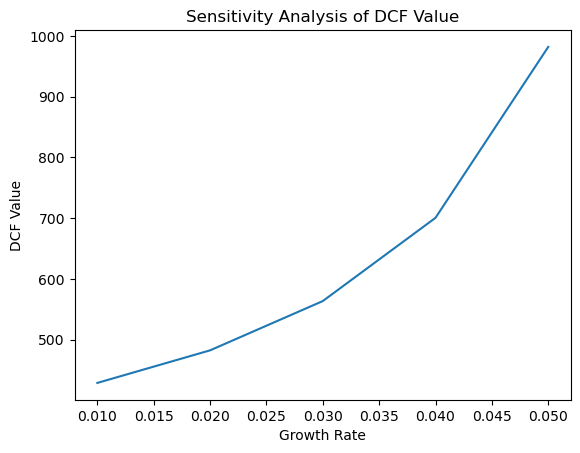

In [63]:
# Example sensitivity analysis
growth_rates = [0.01, 0.02, 0.03, 0.04, 0.05]
dcf_values = []

for growth_rate in growth_rates:
    terminal_value = calculate_terminal_value(revenue_projections[-1], growth_rate, wacc)
    discounted_terminal_value = terminal_value / ((1 + wacc) ** len(revenue_projections))
    dcf_value = discount_cash_flows(revenue_projections, wacc) + discounted_terminal_value
    dcf_values.append(dcf_value)

plt.plot(growth_rates, dcf_values)
plt.xlabel('Growth Rate')
plt.ylabel('DCF Value')
plt.title('Sensitivity Analysis of DCF Value')
plt.show()

In [64]:
indicators = ['Revenue ($B)', 'Earnings ($B)', 'P/E ratio',
       'P/S ratio', 'P/B ratio', 'Operating Margin (%)', 'EPS ($)',  
              'Total debt ($B)', 'Total liabilities ($B)']

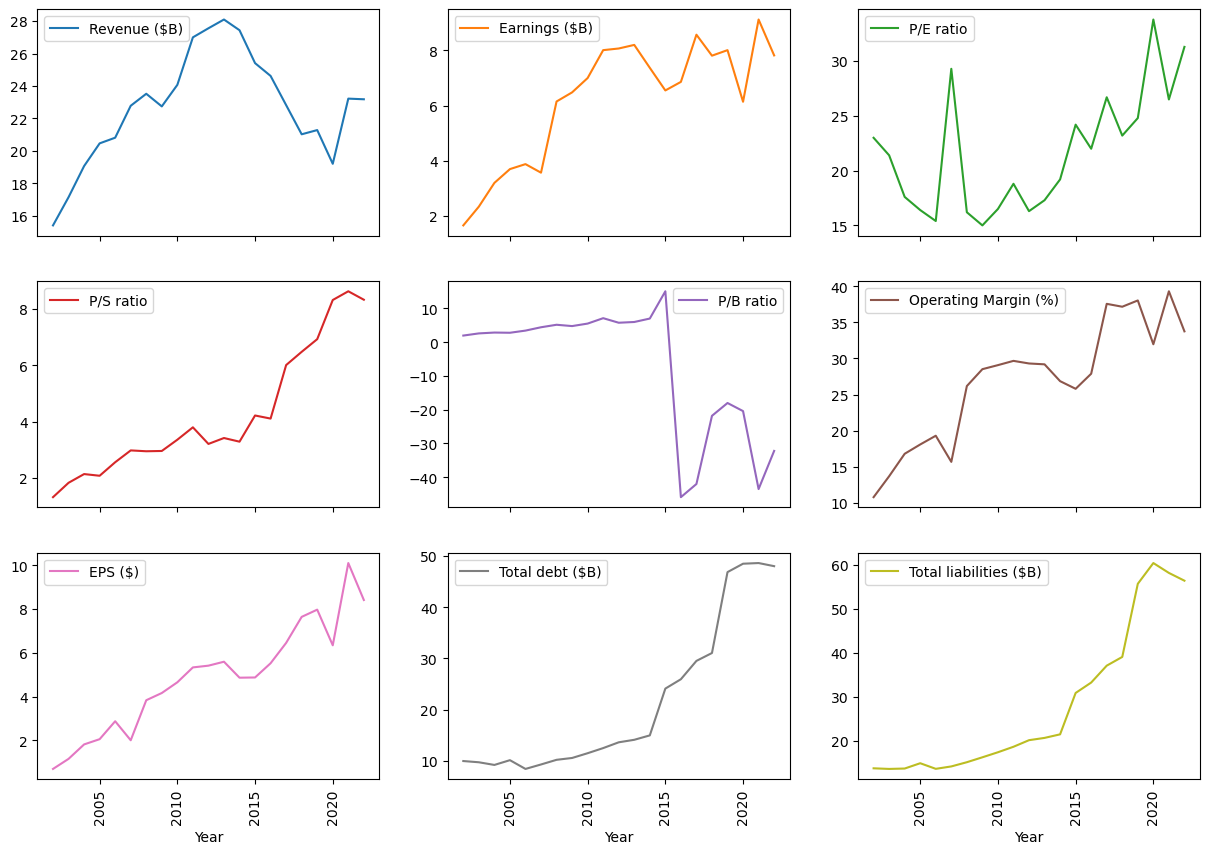

In [66]:
financial_data.plot(x='Year', y=indicators, subplots=True, layout=(3, 3), figsize=(15, 10), sharex=True, rot=90);

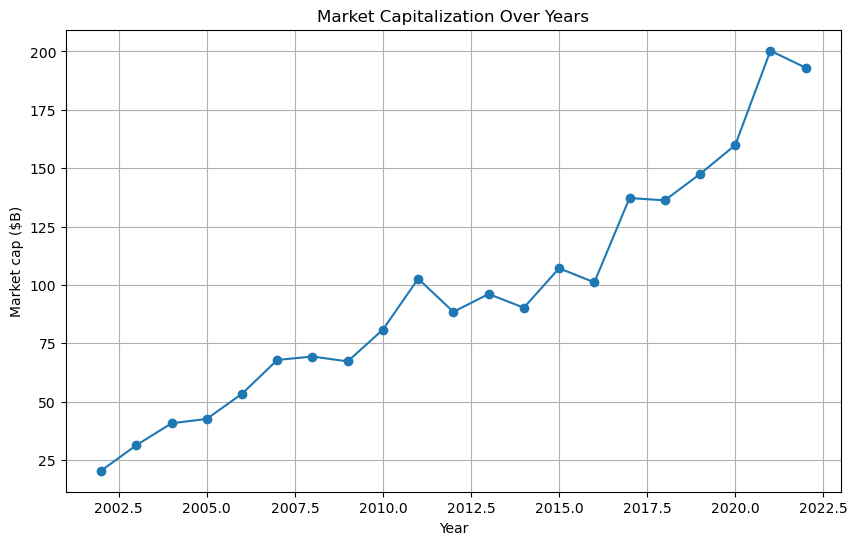

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(financial_data['Year'], financial_data['Market cap ($B)'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Market cap ($B)')
plt.title('Market Capitalization Over Years')
plt.grid(True)

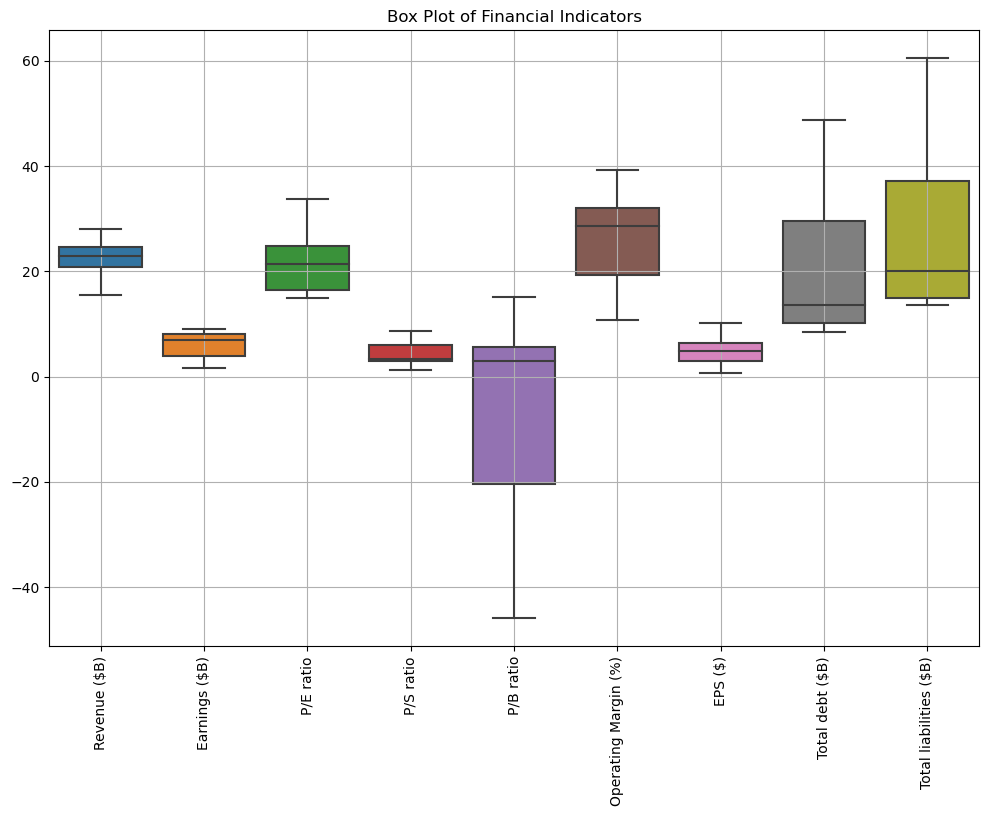

In [72]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.boxplot(data=financial_data[indicators])
plt.title('Box Plot of Financial Indicators')
plt.xticks(rotation=90)
plt.grid(True);

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = financial_data[['Revenue ($B)', 'Earnings ($B)', 'P/E ratio',
       'P/S ratio', 'P/B ratio', 'Operating Margin (%)', 
        'EPS ($)', 'Total liabilities ($B)']]
y = financial_data['Market cap ($B)']  # Assuming you have stock price data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 59.336387475930316


In [82]:
model.score(X_test, y_test)

0.9797233195873958

In [84]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

5.274624088039774

In [85]:
model.coef_

array([-0.20867481, 15.77236841, -0.50337572, 27.10342896, -0.08704249,
       -3.79400818, -2.54259995, -0.10538923])